In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report


In [10]:
tf.config.experimental.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Splitting Data into train and test datasets 

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

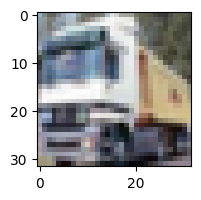

In [4]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [30]:
y_test=y_test.reshape(-1,)

In [7]:
X_train=X_train/255
X_test=X_test/255

# Training ANN Model

In [8]:
ann=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 11s 5ms/step - loss: 1.8173 - accuracy: 0.3525
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6243 - accuracy: 0.4276
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5415 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4817 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4342 - accuracy: 0.4954


# Classification Report of ANN Model

In [32]:
y_pred=ann.predict(X_test)
y_classes=[np.argmax(element) for element in y_pred]
print('classification_report', classification_report(y_test,y_classes))

313/313 [==============================] - 1s 2ms/step
classification_report               precision    recall  f1-score   support

           0       0.60      0.42      0.49      1000
           1       0.56      0.64      0.59      1000
           2       0.47      0.16      0.23      1000
           3       0.42      0.22      0.29      1000
           4       0.34      0.56      0.42      1000
           5       0.55      0.21      0.30      1000
           6       0.44      0.65      0.52      1000
           7       0.63      0.46      0.53      1000
           8       0.48      0.74      0.58      1000
           9       0.43      0.66      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.45     10000
weighted avg       0.49      0.47      0.45     10000



# Training CNN Model

In [9]:
cnn=keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 15s 6ms/step - loss: 1.4720 - accuracy: 0.4709
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1255 - accuracy: 0.6076
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0024 - accuracy: 0.6520
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9219 - accuracy: 0.6809
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8529 - accuracy: 0.7035
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7997 - accuracy: 0.7233
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7533 - accuracy: 0.7399
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7129 - accuracy: 0.7535
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6833 - accuracy: 0.7623
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 

In [12]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.9458 - accuracy: 0.6904


[0.9457914233207703, 0.6904000043869019]

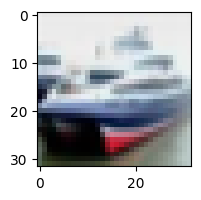

In [14]:
plt.figure(figsize=(15,2))
plt.imshow(X_test[1])

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [17]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.25844812e-05, 2.65390156e-07, 7.32038962e-03, 9.73212481e-01,
        3.83901119e-04, 1.03448499e-02, 6.49348041e-03, 1.60119216e-05,
        2.19050609e-03, 5.60050876e-06],
       [3.85699049e-03, 4.25066799e-01, 1.92783295e-06, 1.47367587e-06,
        5.62394689e-07, 5.34292006e-08, 3.24527782e-08, 4.53009034e-06,
        5.69388926e-01, 1.67871325e-03],
       [7.73327872e-02, 6.46118373e-02, 1.68949796e-03, 2.83600315e-02,
        6.04214845e-03, 8.74191755e-04, 6.66451931e-04, 6.25597080e-03,
        8.11605871e-01, 2.56122113e-03],
       [5.00373363e-01, 2.08330783e-03, 2.38301128e-01, 7.48994276e-02,
        5.34895323e-02, 1.64134326e-04, 1.88319257e-03, 1.12066290e-03,
        1.27675891e-01, 9.35015214e-06],
       [9.27590747e-07, 8.74578691e-05, 1.89650673e-02, 7.82431290e-03,
        9.40483063e-02, 1.10125766e-04, 8.78836989e-01, 2.62940557e-06,
        1.23531820e-04, 6.23957590e-07]], dtype=float32)

In [18]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [20]:
y_test=y_test.reshape(-1,)

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

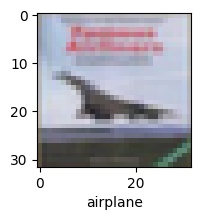

In [25]:
plot_sample(X_test,y_test,3)

In [24]:
classes[y_classes[3]]

'airplane'

# Classification Report of CNN Model

In [26]:
print('Classification Report:\n', classification_report(y_test,y_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.68      0.74      1000
           1       0.87      0.78      0.82      1000
           2       0.53      0.65      0.58      1000
           3       0.48      0.51      0.49      1000
           4       0.62      0.68      0.65      1000
           5       0.65      0.50      0.56      1000
           6       0.74      0.77      0.75      1000
           7       0.70      0.77      0.73      1000
           8       0.77      0.84      0.80      1000
           9       0.84      0.73      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

